<a href="https://colab.research.google.com/github/Dakshita1/Exploratory-Data-Analysis-of-Car-Features/blob/master/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis of Car Features

#STEP 1:

1.1 Importing libraries 

In [14]:
import pandas as pd 
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

1.2 Imporing dataset 

In [15]:
df = pd.read_csv("data.csv")
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


1.3 To identify the type of data and Shape

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [18]:
df.shape

(11914, 16)

In [19]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [20]:
print(df.isnull().sum)

<bound method DataFrame.sum of         Make  Model   Year  ...  city mpg  Popularity   MSRP
0      False  False  False  ...     False       False  False
1      False  False  False  ...     False       False  False
2      False  False  False  ...     False       False  False
3      False  False  False  ...     False       False  False
4      False  False  False  ...     False       False  False
...      ...    ...    ...  ...       ...         ...    ...
11909  False  False  False  ...     False       False  False
11910  False  False  False  ...     False       False  False
11911  False  False  False  ...     False       False  False
11912  False  False  False  ...     False       False  False
11913  False  False  False  ...     False       False  False

[11914 rows x 16 columns]>


#STEP 2:

2.1Removing irrelevant features

This step is done in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category and Number of doors doesn't make any sense to me so I just dropped for this instance. 

In [21]:
df = df.drop(['Engine Fuel Type', 'Number of Doors','Market Category'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


#STEP 3:

3.1 Renaming columns

To improve readability we rename the columns of the data set

In [24]:
df=df.rename(columns={ "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
df

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50920


#STEP 4:

Removing the duplicate data, null values and Missing values

In [25]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [26]:
print(df.isnull().sum()) #dropping null values

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [27]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

#STEP 5:

Ploting graphs for various columns

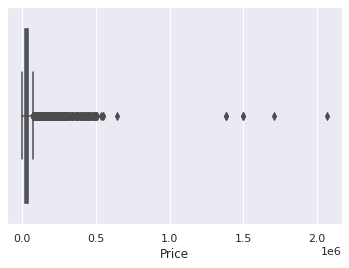

In [28]:
sns.boxplot(x=df['Price'])

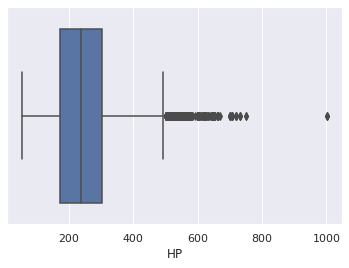

In [29]:
sns.boxplot(x=df['HP'])

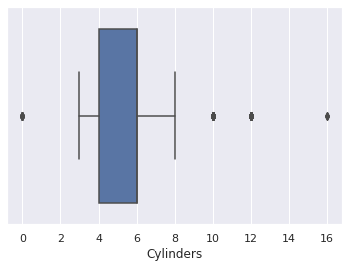

In [30]:
sns.boxplot(x=df['Cylinders'])

In [31]:
#checking outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [32]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8546, 13)

#STEP 6:

Most represented car brands

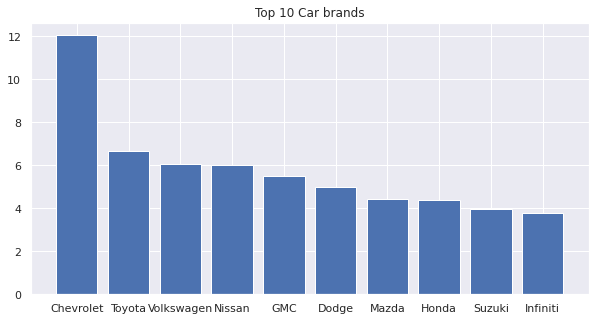

In [33]:
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())  # Percentage of car per brand
popular_labels = counts.index[:10]   # Top 10 car brands
plt.figure(figsize=(10,5))
plt.bar(popular_labels, height=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [34]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


#STEP 7:

Plotting the correlation matrix

From the below matrix, it is known that 1.There is a high correlation between "cylinder and HP" and "highway-mpg and city-mpg". 2.There is high anticorrelation between "cylinder and highway-mpg". 

In [35]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


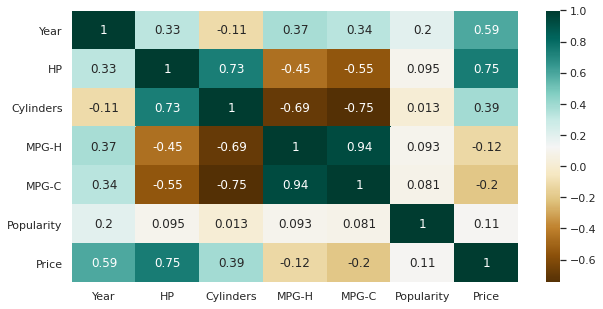

In [36]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True) # Finding the relations between the variables

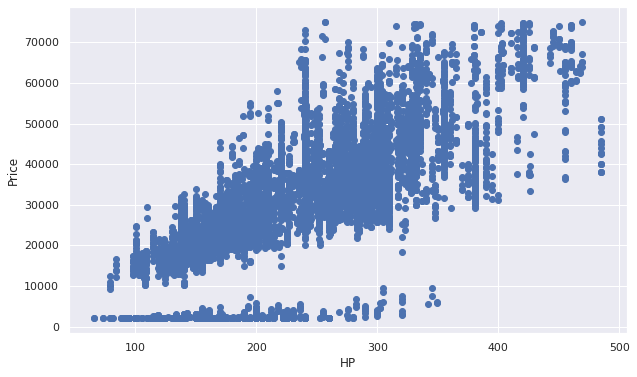

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

#STEP 8:

Performing EDA

From the below graphs we came to the following conclusions:
 1. Car price increased after year 2000 
 2. More the no the cylinders, more is the price 
 3. For MPG-H 13, price is maximum and for MPG-H 15, price is lowest. 
 4. For MPG-C 10, price is maximum and for MPG-C 31, price is minimum

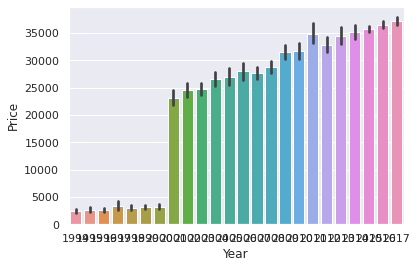

In [38]:
sns.barplot(df['Year'],df['Price'])

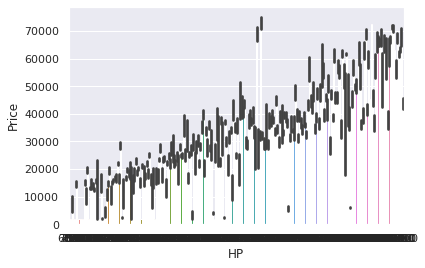

In [39]:
sns.barplot(df['HP'],df['Price'])

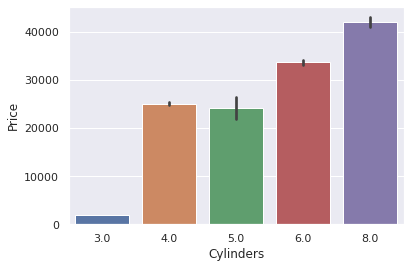

In [41]:
sns.barplot(df['Cylinders'],df['Price'])

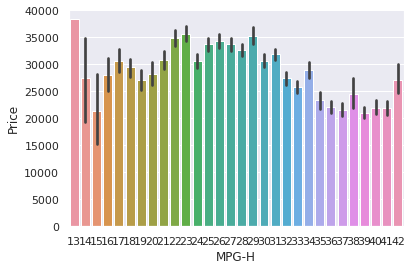

In [42]:
sns.barplot(df['MPG-H'],df['Price'])

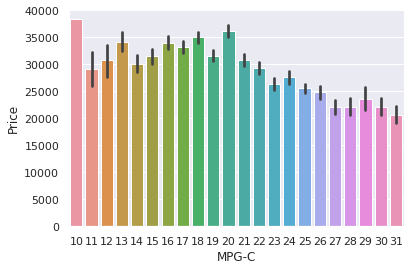

In [43]:
sns.barplot(df['MPG-C'],df['Price'])

#STEP 9:


9.1 Splitting dataset into 80 and 20 ratio

In [44]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1] #price as the target variable
x,y

(          Make       Model  Year  ...  MPG-H  MPG-C Popularity
 0          BMW  1 Series M  2011  ...     26     19       3916
 1          BMW    1 Series  2011  ...     28     19       3916
 2          BMW    1 Series  2011  ...     28     20       3916
 3          BMW    1 Series  2011  ...     28     18       3916
 4          BMW    1 Series  2011  ...     28     18       3916
 ...        ...         ...   ...  ...    ...    ...        ...
 11909    Acura         ZDX  2012  ...     23     16        204
 11910    Acura         ZDX  2012  ...     23     16        204
 11911    Acura         ZDX  2012  ...     23     16        204
 11912    Acura         ZDX  2013  ...     23     16        204
 11913  Lincoln      Zephyr  2006  ...     26     17         61
 
 [8546 rows x 12 columns], 0        46135
 1        40650
 2        36350
 3        29450
 4        34500
          ...  
 11909    46120
 11910    56670
 11911    50620
 11912    50920
 11913    28995
 Name: Price, Length: 8546, 

In [45]:
diff_dtype=df.select_dtypes(exclude=[np.number]).columns
diff_dtype

Index(['Make', 'Model', 'Transmission', 'Drive Mode', 'Vehicle Size',
       'Vehicle Style'],
      dtype='object')

In [46]:
from sklearn import preprocessing
labelencoder= preprocessing.LabelEncoder()
for i in diff_dtype:
    x[i]=labelencoder.fit_transform(df[i])

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

9.2 Performing linear regressiom

In [48]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y_pred=model.predict(x_test)
y_pred

array([34889.7517287 , 33720.92027487, 41294.5099361 , ...,
       12067.11096887, 30426.46700139, 35411.63253855])

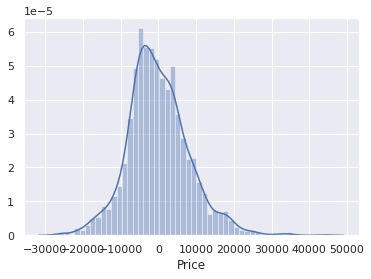

In [50]:
sns.distplot((y_test-y_pred),bins=50)

In [51]:
print("training accuracy:",model.score(x_train,y_train))
print("testing accuracy:",model.score(x_test,y_test))

training accuracy: 0.7179385625430319
testing accuracy: 0.7055995762796481


In [52]:
#R squared
import sklearn
r2=sklearn.metrics.r2_score(y_test,y_pred)
print("R squared=",r2)

R squared= 0.7055995762796481


#STEP 10:

checking algorithms

In [53]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

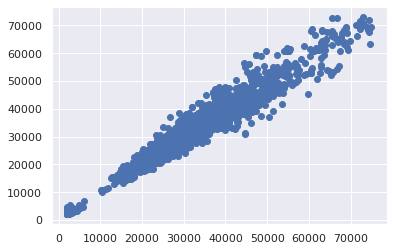

In [54]:
y_pred = regressor.predict(x_test)
plt.scatter(y_test,y_pred)

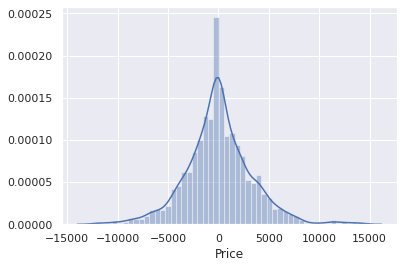

In [55]:
sns.distplot((y_test-y_pred),bins=50)

In [56]:
from sklearn import metrics
print('R2 Score:', metrics.r2_score(y_test, y_pred))

R2 Score: 0.9506244655920364
